# Implementing Linear Regression from scratch
I am to demonstrate how to construct a linear regression model using only numpy.

### Importing libraries
I have imported all the libraries required in a single cell


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LinearRegression class

I created a LinearRegression class. There are two methods in this class:

1. ```fit()```: For calculating beta hat, making in sample predictions and calculating training loss 

2. ```predict()```: forming out-of-sample predictions. 


In [9]:
class LinearRegression:
    
    def fit(self, x, y, intercept = False):
        
        #record data and dimensions
        if intercept == False: # add intercept if none
            ones = np.ones(len(x)).reshape(len(x), 1)
            x= np.concatenate((ones, x), axis =1)
        self.x = np.array(x)
        self.y= np.array(y)
        self.N, self.D = self.x.shape
        
        # estimate parameter
        xtx = np.dot(self.x.T, self.x)
        xtx_inverse = np.linalg.inv(xtx)
        xty= np.dot(self.x.T,y)
        self.beta_hats= np.dot(xtx_inverse, xty)
        
        # make in smaple predictions
        self.y_hat = np.dot(self.x, self.beta_hats)
        
        # calculate loss
        self.L = .5*np.sum((self.y - self.y_hat)**2) 
    
    def predict(self, X_test, intercept = True):
        
        # form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)
            

### Trying out our LinearRegression class
Lets try it out using California Housing dataset from sklearn.datasets

In [10]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X= data['data']
y= data['target']

In [11]:
model = LinearRegression()
model.fit(X, y, intercept = False)

### Visualizing
Lets see how well our fitted calues model the true target value.

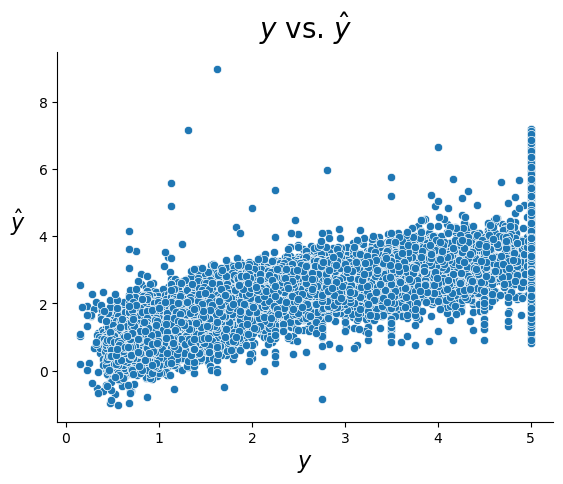

In [13]:
fig, ax = plt.subplots()
sns.scatterplot(x= model.y, y= model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()